<a href="https://colab.research.google.com/github/ivmtorres/AM-IA2021/blob/main/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm

In [2]:
#agregar archivos de test.csv
from google.colab import files
files.upload()

Saving test.csv to test.csv


{'test.csv': b',V1,V2,label\n0,-0.4053563471231154,0.4637821456068184,1.0\n1,0.39003731022801513,3.3631844870980325,1.0\n2,0.1627982640747896,-0.8927720661295204,-1.0\n3,-0.2666836162489856,1.8347793906340433,1.0\n4,-1.4335522273115537,-2.6839645450269503,-1.0\n5,-2.3525878310153114,-0.9361110867093858,-1.0\n6,3.6494121344914405,2.636905751543738,1.0\n7,1.9630511388247682,0.42875560335355634,1.0\n8,1.7670770502477335,-1.0517542297759888,-1.0\n9,-0.8870832412965262,1.0774798029508608,1.0\n10,-1.7806977278802019,-1.4865566171476265,-1.0\n11,0.8646158969742737,2.2494512966075755,1.0\n12,1.350697964426168,1.7456783637521978,1.0\n13,-1.1637502995009774,0.3199611990434794,-1.0\n14,0.92452338009104,0.8685784131891263,1.0\n15,-1.8813317843096886,-1.995708993208927,-1.0\n16,1.3362125012354937,-0.09114367874418461,1.0\n17,0.8068981305657517,3.763910529464872,1.0\n18,1.9151150802807475,-0.45615423625267826,1.0\n19,0.45998226741916937,0.6566360451063231,1.0\n20,-0.2914587626667754,-0.5717624970383

In [3]:
#agregar archivos de train.csv
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b',V1,V2,label\n0,-0.9393812750644306,-0.39517594094534325,-1.0\n1,-2.999302067147885,-1.0822222115593454,-1.0\n2,2.154990858934158,-2.355405559784046,1.0\n3,1.434487665227125,1.7555286437235966,1.0\n4,-0.9742043973801674,-0.8781936638146006,-1.0\n5,-0.1445681887439999,-0.9953816229310051,-1.0\n6,1.640880406305183,0.7898995106295088,1.0\n7,0.6156061239138757,-2.0807379224384377,-1.0\n8,1.2424594230633905,2.325094610007969,1.0\n9,0.6228041657949106,-0.7485199955832575,-1.0\n10,3.5925289473698943,-0.9729150630607772,1.0\n11,2.260183467548326,0.911466858222639,1.0\n12,2.4135809719896235,1.2112738993920362,1.0\n13,-1.5557941718952164,-0.506103822620976,-1.0\n14,2.1775082080812815,-1.4948364797705147,-1.0\n15,-0.2916508024892348,2.0045943320334456,1.0\n16,1.3434695403104449,-0.21632304914389966,1.0\n17,0.44688738309959697,-1.7739208868299003,-1.0\n18,3.149410291158837,0.8371231118218685,1.0\n19,1.7411177195556808,2.096827600348024,1.0\n20,0.19344063136585632,0.3701945875196416

In [4]:
#leemos el archivo de train
df_train=pd.read_csv('/content/train.csv', usecols=['V1','V2','label'])

In [5]:
df_train

,V1,V2,label
0,-0.939381,-0.395176,-1.0
1,-2.999302,-1.082222,-1.0
2,2.154991,-2.355406,1.0
3,1.434488,1.755529,1.0
4,-0.974204,-0.878194,-1.0
...,...,...,...
315,0.917605,-0.614699,1.0
316,2.302187,-1.090539,-1.0
317,-0.053646,-3.035034,-1.0
318,0.071802,0.938660,1.0


In [6]:
#leemos el archivo de test
df_test=pd.read_csv('/content/test.csv', usecols=['V1','V2','label'])

In [7]:
df_test

,V1,V2,label
0,-0.405356,0.463782,1.0
1,0.390037,3.363184,1.0
2,0.162798,-0.892772,-1.0
3,-0.266684,1.834779,1.0
4,-1.433552,-2.683965,-1.0
...,...,...,...
75,0.361198,-0.450939,1.0
76,0.932207,0.676744,1.0
77,1.055278,3.865443,1.0
78,0.661440,0.682084,1.0


Realizamos pruebas con la funcion SVM de sklearn

In [138]:
x_train=df_train[['V1','V2']]
y_train=df_train['label']

In [139]:
x_test=df_test[['V1','V2']]
y_test=df_test['label']

In [140]:
x=np.array(x_train)
y=np.array(y_train)

In [141]:
x.shape

(320, 2)

In [142]:
y.shape

(320,)

In [174]:
clf = svm.SVC(kernel='linear', C = 1)
clf.fit(x,y) #entreno

y_prediccion=clf.predict(x_test)#testeo
print(y_prediccion.shape)
print(y_prediccion)

(80,)
[ 1.  1. -1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1.
  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.
  1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1. -1.
 -1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1.
  1. -1. -1.  1.  1.  1.  1.  1.]


In [175]:
x_np_test=np.array(x_test)
y_np_test=np.array(y_test)

In [176]:

# cargamos los resultados de la prediccion y con los que voy a comparamos
data = {'Prediccion': y_prediccion, 'Real': y_np_test}
# armo un df
df_resultados = pd.DataFrame(data)
# Print the output.
print(df_resultados)

    Prediccion  Real
0          1.0   1.0
1          1.0   1.0
2         -1.0  -1.0
3          1.0   1.0
4         -1.0  -1.0
..         ...   ...
75         1.0   1.0
76         1.0   1.0
77         1.0   1.0
78         1.0   1.0
79         1.0  -1.0

[80 rows x 2 columns]


In [177]:
#cuento los que son diferentes.
count_diff_values=df_resultados['Prediccion'].compare(df_resultados['Real']).shape[0]

In [178]:
#porcentaje de aciertos en el paquete de testing
cantidad_valores_testear = 80
porcentaje_errores_testing = (count_diff_values/cantidad_valores_testear)*100
porcentaje_aciertos_testing = 100 - porcentaje_errores_testing
print(str(porcentaje_aciertos_testing)+'%')

92.5%


Copio la funcion para calcular el gradiente descendente banana


Planteamos la función de costo alternativa.
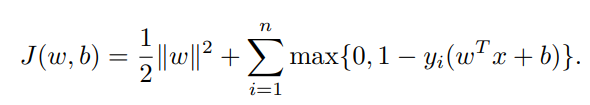

Estimador de etiquetas \\
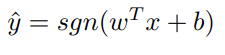

In [277]:
def hloss(x,y,w,b,C):

  #itero dentro de la sumatoria desde i = 1 hast n -->Hloss
  resultado = 0
  valor_decision = 0
  for x_i, y_i in zip(x,y):
    y_estimada = np.dot(w.T,x_i)+b
    #calculo el valor de t = y*y^
    valor_decision=1-y_i*y_estimada
    if valor_decision > 0:
      resultado += valor_decision
    else:
      resultado += 0
  resultado = resultado * C
  J_nuevo = 0.5 * (np.dot(w,w)) + resultado #le sumo el valor de la norma de w 
  return J_nuevo
  


In [278]:
def GradR_Suma_GradHLoss(w,subGradiente_w):
  return w+subGradiente_w

In [279]:
def subGradienteHLoss(x,y,w,b,C):
  subgradiente_w=0 #los valores acumulados en la sumatoria, valor inicial
  subgradiente_b=0
  #itero dentro de la sumatoria desde i = 1 hast n -->Hloss
  for x_i, y_i in zip(x,y):
    y_estimada = np.dot(np.transpose(w),x_i)+b
    #calculo el valor de t = y*y^
    valor_decision=y_i*y_estimada
    if valor_decision < 1:
      subgradiente_w += -y_i*x_i
      subgradiente_b += -1*y_i
    else:
      subgradiente_w += 0
      subgradiente_b += 0
  #multiplico por el termino C
  subgradiente_w = C * subgradiente_w
  subgradiente_b = C * subgradiente_b
  # le umo el termino w al subgradiente de w
  gradiente_w_completo = GradR_Suma_GradHLoss(w,subgradiente_w)
  gradiente_b_completo = subgradiente_b # no tiene termino a sumar
  return (gradiente_w_completo,gradiente_b_completo)

In [280]:
def stochastic_subgrad_descent(dataTrain, initial_values, B, C, T,epsilon):
    w, b = initial_values
    J_anterior = 0
    array_delta_J = np.array([])
    for t in range(1, T+1):
        
        # selecciono tama;o de muestras aleatorio pero con un tama;o fijo
        training_sample = dataTrain.sample(B)
        
        # set learning rate
        learning_rate = 0.012 
        
        # selecciono las columnas V1 y V2
        x = training_sample[['V1', 'V2']].values
      
        # selecciono las etiquetas 
        y = training_sample['label'].values
      
        sub_grads = subGradienteHLoss(x,y, w, b, C)
        
        # actualizamos w multiplicado por la tasa de aprendizaje
        w = w - learning_rate * sub_grads[0]
        
        # actualizamos b
        b = b - learning_rate * sub_grads[1]
        
        #Actualizo el J nuevo
        J_nuevo = hloss(x,y,w,b,C)
        
        #Calculo el delta J
        delta_J = J_anterior-J_nuevo
        
        #Armo el array_delta_J
        array_delta_J = np.append(array_delta_J, delta_J)
        
        #Actualizo el valor de J anterior
        J_anterior = J_nuevo

        #corto la iteracion en epsilon menos a 0.01
        if abs(delta_J) < epsilon:
          break
      
        
    return (w,b,array_delta_J)

In [281]:
#doy valores iniciales a w y b
w_0 = np.array([-2, -3])
b_0 = 12

w_b_0 = (w_0, b_0)

In [282]:
#tam;o de batch
batch = 100
#valor de C
C = 1

In [283]:
#leemos el archivo de train
data_train=pd.read_csv('/content/train.csv', usecols=['V1','V2','label'])

In [284]:
type(data_train)

pandas.core.frame.DataFrame

In [285]:
data_train.sample(20)

,V1,V2,label
69,-0.731157,-0.518598,-1.0
232,-3.742944,-0.508266,-1.0
297,-0.790250,0.162961,1.0
308,1.522058,1.829040,1.0
15,-0.291651,2.004594,1.0
136,1.567216,1.341821,1.0
107,-0.712404,1.611344,-1.0
42,0.136922,2.155254,1.0
223,1.570935,0.546547,1.0
175,0.875447,1.023612,1.0


In [286]:
w,b,deltas_J = stochastic_subgrad_descent(data_train, w_b_0, batch, C, 1000,epsilon=0.01)

In [287]:
w

array([1.01565102, 1.11839322])

In [288]:
b

0.5040000000000013

In [289]:
deltas_J.shape

(956,)

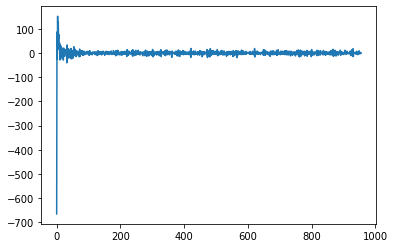

In [290]:
#grafico los delta J para ver como se va reduciendo la funcion de costo.
import matplotlib.pyplot as plt
plt.plot(deltas_J) # plotting by columns
plt.show()


In [291]:
#cargo los valores de testing
x_np_test=np.array(x_test)
y_np_test=np.array(y_test)

In [292]:
x_np_test.shape

(80, 2)

In [293]:
#Realizo la evaluacion de la y estimada
array_y_estimada=np.array([])
y_estimada=0
contador=0
for x_i in x_np_test:
  y_estimada=np.dot(w.T,x_i)+b
  array_y_estimada=np.append(array_y_estimada,np.sign(y_estimada))
  contador += 1
  

In [294]:
array_y_estimada.shape

(80,)

In [295]:
#cantidad de iteraciones
contador

80

In [296]:
#datos en las etiquetas estimadas
array_y_estimada

array([ 1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,
       -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,
        1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,
        1., -1.])

In [297]:
#cuento los que son diferentes.
porcentaje_aciertos_testing_SVM=(100 * np.count_nonzero(y_np_test == array_y_estimada))/80

In [298]:
#muestro el porcentaje de aciertos para el SVM estocastico
porcentaje_aciertos_testing_SVM

93.75

In [299]:
#muestro los valores de la funcion de sklearn para comparar con el algoritmo armado
clf

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [300]:
#muestro los w
clf.coef_ 

array([[1.19940644, 1.20709042]])

In [301]:
 #muestro el b
 clf.intercept_

array([0.50651953])

In [302]:
# Los valores son bastante parecidos pero tenemos un mejor porcentaje de aciertos en el SVM estocastico.

Realizamos las mismas corridas para un parametro de compensación de C = 0.1  

In [303]:
clf = svm.SVC(kernel='linear', C = 0.1)
clf.fit(x,y) #entreno

y_prediccion=clf.predict(x_test)#testeo


In [304]:
x_np_test=np.array(x_test)
y_np_test=np.array(y_test)

In [305]:
# cargamos los resultados de la prediccion y con los que voy a comparamos
data = {'Prediccion': y_prediccion, 'Real': y_np_test}
# armo un df
df_resultados = pd.DataFrame(data)


In [306]:
#cuento los que son diferentes.
count_diff_values=df_resultados['Prediccion'].compare(df_resultados['Real']).shape[0]

In [307]:
#porcentaje de aciertos en el paquete de testing
cantidad_valores_testear = 80
porcentaje_errores_testing = (count_diff_values/cantidad_valores_testear)*100
porcentaje_aciertos_testing = 100 - porcentaje_errores_testing
print("el porcentaje de exitos =",str(porcentaje_aciertos_testing),'%')

el porcentaje de exitos = 93.75 %


In [308]:
#muestro los valores de la funcion de sklearn para comparar con el algoritmo armado
clf

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [309]:
#muestro los w
clf.coef_ 

array([[0.87458469, 0.89832016]])

In [310]:
 #muestro el b
 clf.intercept_

array([0.4132359])

In [311]:
#doy valores iniciales a w y b
w_0 = np.array([-2, -3])
b_0 = 12

w_b_0 = (w_0, b_0)

In [312]:
#tam;o de batch
batch = 100
#valor de C
C = 0.1

In [313]:
#leemos el archivo de train
data_train=pd.read_csv('/content/train.csv', usecols=['V1','V2','label'])

In [314]:
w,b,deltas_J = stochastic_subgrad_descent(data_train, w_b_0, batch, C, 1000,epsilon=0.01)

In [315]:
w

array([0.82328411, 0.83840176])

In [316]:
b

0.5748000000000019

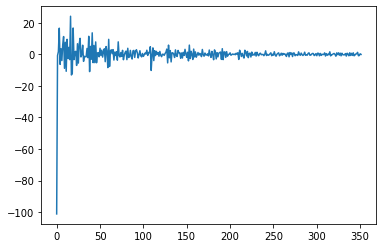

In [317]:
#grafico los delta J para ver como se va reduciendo la funcion de costo.
import matplotlib.pyplot as plt
plt.plot(deltas_J) # plotting by columns
plt.show()

In [318]:
#cargo los valores de testing
x_np_test=np.array(x_test)
y_np_test=np.array(y_test)

In [319]:
#Realizo la evaluacion de la y estimada
array_y_estimada=np.array([])
y_estimada=0
contador=0
for x_i in x_np_test:
  y_estimada=np.dot(w.T,x_i)+b
  array_y_estimada=np.append(array_y_estimada,np.sign(y_estimada))
  contador += 1
  

In [320]:
#cuento los que son diferentes.
porcentaje_aciertos_testing_SVM=(100 * np.count_nonzero(y_np_test == array_y_estimada))/80

In [321]:
#muestro el porcentaje de aciertos para el SVM estocastico
print("porcentaje de exitos = ",porcentaje_aciertos_testing_SVM,"%")

porcentaje de exitos =  95.0 %


Realizamos las mismas corridas para un parametro de compensación de C = 10

In [322]:
clf = svm.SVC(kernel='linear', C = 10)
clf.fit(x,y) #entreno

y_prediccion=clf.predict(x_test)#testeo


In [323]:
x_np_test=np.array(x_test)
y_np_test=np.array(y_test)

In [324]:
# cargamos los resultados de la prediccion y con los que voy a comparamos
data = {'Prediccion': y_prediccion, 'Real': y_np_test}
# armo un df
df_resultados = pd.DataFrame(data)


In [325]:
#cuento los que son diferentes.
count_diff_values=df_resultados['Prediccion'].compare(df_resultados['Real']).shape[0]

In [326]:
#porcentaje de aciertos en el paquete de testing
cantidad_valores_testear = 80
porcentaje_errores_testing = (count_diff_values/cantidad_valores_testear)*100
porcentaje_aciertos_testing = 100 - porcentaje_errores_testing
print("el porcentaje de exitos =",str(porcentaje_aciertos_testing),'%')

el porcentaje de exitos = 93.75 %


In [327]:
#muestro los valores de la funcion de sklearn para comparar con el algoritmo armado
clf

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [328]:
#muestro los w
clf.coef_ 

array([[1.19940644, 1.20709042]])

In [329]:
 #muestro el b
 clf.intercept_

array([0.50651953])

In [330]:
#doy valores iniciales a w y b
w_0 = np.array([-2, -3])
b_0 = 12

w_b_0 = (w_0, b_0)

In [331]:
#tam;o de batch
batch = 100
#valor de C
C = 10

In [332]:
#leemos el archivo de train
data_train=pd.read_csv('/content/train.csv', usecols=['V1','V2','label'])

In [333]:
w,b,deltas_J = stochastic_subgrad_descent(data_train, w_b_0, batch, C, 1000,epsilon=0.01)

In [334]:
w

array([1.9973304 , 1.84619175])

In [335]:
b

-0.7200000000000064

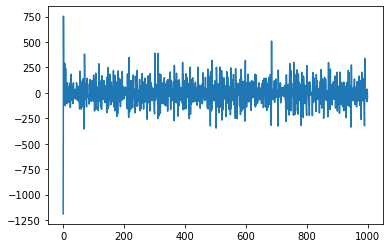

In [336]:
#grafico los delta J para ver como se va reduciendo la funcion de costo.
import matplotlib.pyplot as plt
plt.plot(deltas_J) # plotting by columns
plt.show()

In [337]:
#cargo los valores de testing
x_np_test=np.array(x_test)
y_np_test=np.array(y_test)

In [338]:
#Realizo la evaluacion de la y estimada
array_y_estimada=np.array([])
y_estimada=0
contador=0
for x_i in x_np_test:
  y_estimada=np.dot(w.T,x_i)+b
  array_y_estimada=np.append(array_y_estimada,np.sign(y_estimada))
  contador += 1
  

In [339]:
#cuento los que son diferentes.
porcentaje_aciertos_testing_SVM=(100 * np.count_nonzero(y_np_test == array_y_estimada))/80

In [340]:
#muestro el porcentaje de aciertos para el SVM estocastico
print("porcentaje de exitos = ",porcentaje_aciertos_testing_SVM,"%")

porcentaje de exitos =  90.0 %


Podemos ver que al ajustar el parametro de compensacion, a 0.1 y a 10 lo que estamos obteniendo es un overfitting o un sobre amortiguamiento. El error para el sistema sobre amortiguado se mayor.